# Gold & Silver Price Analysis and Forecasting

The goal of is project is to:
1. Download gold and silver price data using yFinance
2. Create some useful features from the price data
3. Visualize the prices and trends
4. Train a simple machine learning model to predict prices

## Step 1: Import Libraries

First, let's import all the libraries we need.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Make sure we can see all columns
pd.set_option('display.max_columns', 50)

print('Libraries imported successfully!')

Libraries imported successfully!


## Step 2: Download Price Data

We'll use yFinance to download gold and silver futures prices.

The tickers used are:
- Gold: 'GC=F'
- Silver: 'SI=F'
- Date Range: '2025-01-01' to '2026-01-09'
- Interval: '1d' (daily data)

Gold and Silver futures are used for analysis. They provide a more accurate representation of market prices compared to spot prices. 

The difference between futures and spot prices can be significant due to factors like storage costs, interest rates, and market expectations.

Additionally, futures prices are often more liquid and reflect market sentiment better than spot prices, making them preferable for analysis and forecasting in financial markets.
Spot prices can be more volatile and may not capture the full market dynamics, especially for commodities like gold and silver that are influenced by various economic factors.

In [2]:
# Define what we want to download
tickers = ['GC=F', 'SI=F']  # Gold and Silver futures
start_date = '2025-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')  # Today's date

print(f"Downloading data from {start_date} to {end_date}")

# Download the data
raw_data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Get just the closing prices
prices = raw_data['Close'].copy()

# Rename columns to be clearer
prices.columns = ['GOLD', 'SILVER']

print(f"Downloaded {len(prices)} days of data")
prices.head()

Downloaded 261 days of data


,GOLD,SILVER
Date,,
2025-01-02,2658.899902,29.622000
2025-01-03,2645.000000,29.806000
2025-01-06,2638.399902,30.341999
2025-01-07,2656.699951,30.447001
2025-01-08,2664.500000,30.452000


## Step 3: Create Features

Now we'll create some useful features (also called "technical indicators") that might help us predict future prices.

**Features we'll create:**
- **Daily Return**: How much the price changed today (in percentage)
- **Moving Average (MA)**: Average price over the last N days
- **Volatility**: How much the price has been jumping around lately
- **RSI**: A measure of momentum (whether the price is rising or falling)

Gold and silver prices are represented in US dollars per ounce (USD/oz) in the dataset

In [3]:
# Create a copy to add features
df = prices.copy()

# For each asset (Gold and Silver), create features
for asset in ['GOLD', 'SILVER']:
    
    # Daily return (percentage change from yesterday)
    df[f'{asset}_return'] = df[asset].pct_change() * 100
    
    # 10-day moving average
    df[f'{asset}_ma10'] = df[asset].rolling(window=10).mean()
    
    # 20-day moving average
    df[f'{asset}_ma20'] = df[asset].rolling(window=20).mean()
    
    # 20-day volatility (standard deviation of returns)
    df[f'{asset}_volatility'] = df[asset].pct_change().rolling(window=20).std() * 100

# Gold/Silver ratio (how many ounces of silver = 1 ounce of gold)
df['gold_silver_ratio'] = df['GOLD'] / df['SILVER']

print("Features created!")
print(f"Total columns: {len(df.columns)}")
df.tail()

Features created!
Total columns: 11


,GOLD,SILVER,GOLD_return,GOLD_ma10,GOLD_ma20,GOLD_volatility,SILVER_return,SILVER_ma10,SILVER_ma20,SILVER_volatility,gold_silver_ratio
Date,,,,,,,,,,,
2026-01-08,4449.700195,74.716003,0.008999,4416.300049,4376.600024,1.486134,-3.136058,74.398201,69.567851,5.412585,59.554848
2026-01-09,4490.299805,78.884003,0.912412,4417.270020,4391.295020,1.486668,5.578456,75.183501,70.493101,5.493605,56.922819
2026-01-12,4604.299805,84.610001,2.538806,4424.789990,4407.235010,1.515387,7.258757,75.995901,71.527151,5.559874,54.417915
2026-01-13,4589.200195,85.876999,-0.327946,4451.200000,4421.690015,1.523432,1.497457,77.598001,72.752901,5.403462,53.439224
2026-01-14,4626.299805,90.869003,0.808411,4476.819971,4437.669995,1.526316,5.812970,78.947501,74.149351,5.474891,50.911748


In [4]:
# Remove rows with missing values (first few rows will have NaN because of rolling calculations)
df_clean = df.dropna()

print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_clean)}")

df_clean.head()

Rows before cleaning: 261
Rows after cleaning: 241


,GOLD,SILVER,GOLD_return,GOLD_ma10,GOLD_ma20,GOLD_volatility,SILVER_return,SILVER_ma10,SILVER_ma20,SILVER_volatility,gold_silver_ratio
Date,,,,,,,,,,,
2025-01-31,2812.500000,32.127998,-0.371945,2771.620044,2726.150012,0.840078,-0.729206,31.190800,30.8951,1.818413,87.540468
2025-02-03,2833.899902,32.391998,0.760885,2780.580029,2735.595007,0.824035,0.821713,31.334900,31.0244,1.820118,87.487653
2025-02-04,2853.300049,32.888000,0.684574,2790.410034,2746.340015,0.814761,1.531249,31.492600,31.1517,1.810526,86.758088
2025-02-05,2871.600098,32.856998,0.641364,2800.810034,2757.085022,0.813838,-0.094266,31.654399,31.2722,1.814137,87.396909
2025-02-06,2856.000000,32.518002,-0.543255,2810.100024,2766.660022,0.840292,-1.031734,31.838900,31.3755,1.840662,87.828276


## Step 4: Visualize the Data

Let's create some charts to understand our data better.

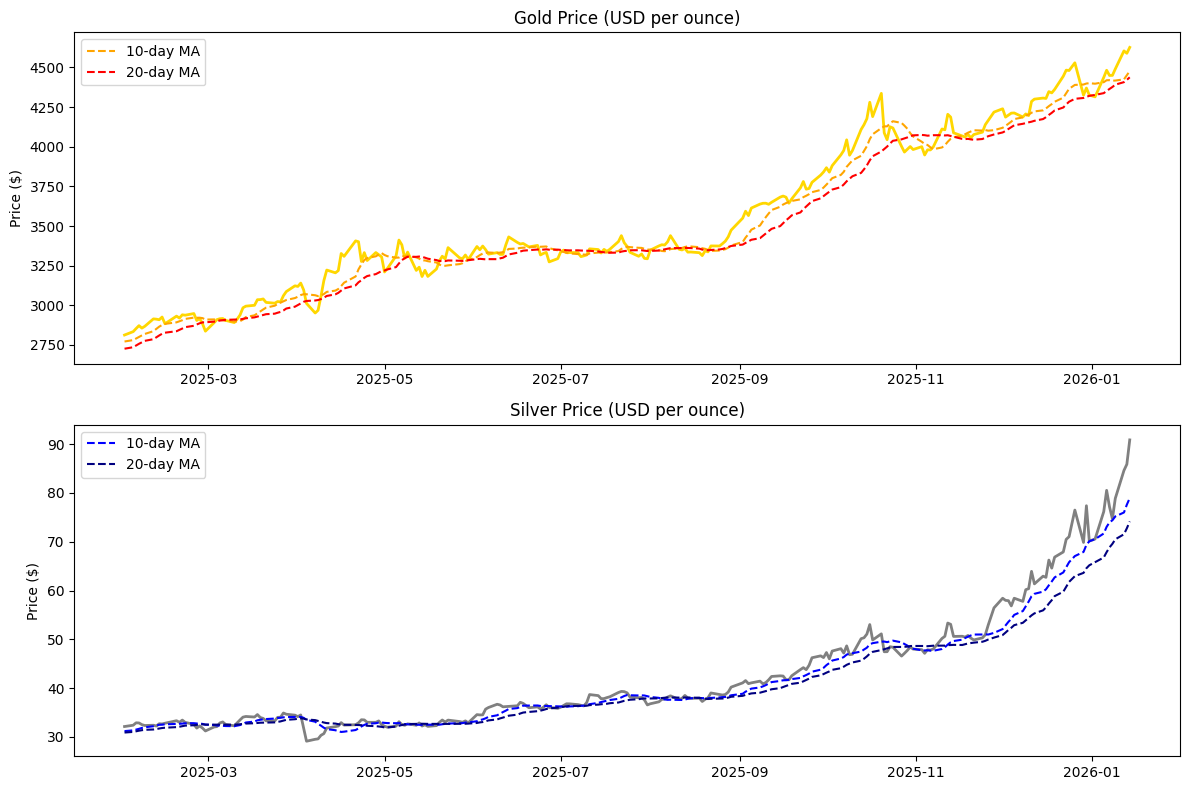

In [5]:
# Plot Gold and Silver prices
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Gold price
axes[0].plot(df_clean.index, df_clean['GOLD'], color='gold', linewidth=2)
axes[0].plot(df_clean.index, df_clean['GOLD_ma10'], color='orange', linestyle='--', label='10-day MA')
axes[0].plot(df_clean.index, df_clean['GOLD_ma20'], color='red', linestyle='--', label='20-day MA')
axes[0].set_title('Gold Price (USD per ounce)')
axes[0].set_ylabel('Price ($)')
axes[0].legend()

# Silver price
axes[1].plot(df_clean.index, df_clean['SILVER'], color='gray', linewidth=2)
axes[1].plot(df_clean.index, df_clean['SILVER_ma10'], color='blue', linestyle='--', label='10-day MA')
axes[1].plot(df_clean.index, df_clean['SILVER_ma20'], color='navy', linestyle='--', label='20-day MA')
axes[1].set_title('Silver Price (USD per ounce)')
axes[1].set_ylabel('Price ($)')
axes[1].legend()

plt.tight_layout()
plt.show()

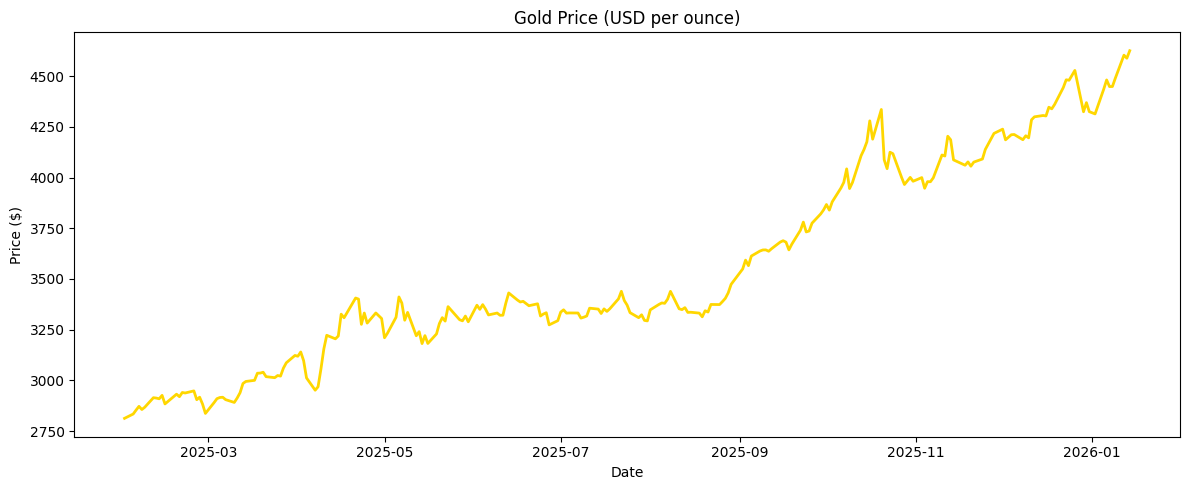

In [6]:
# Gold Price Chart
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['GOLD'], color='gold', linewidth=2)
plt.title('Gold Price (USD per ounce)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

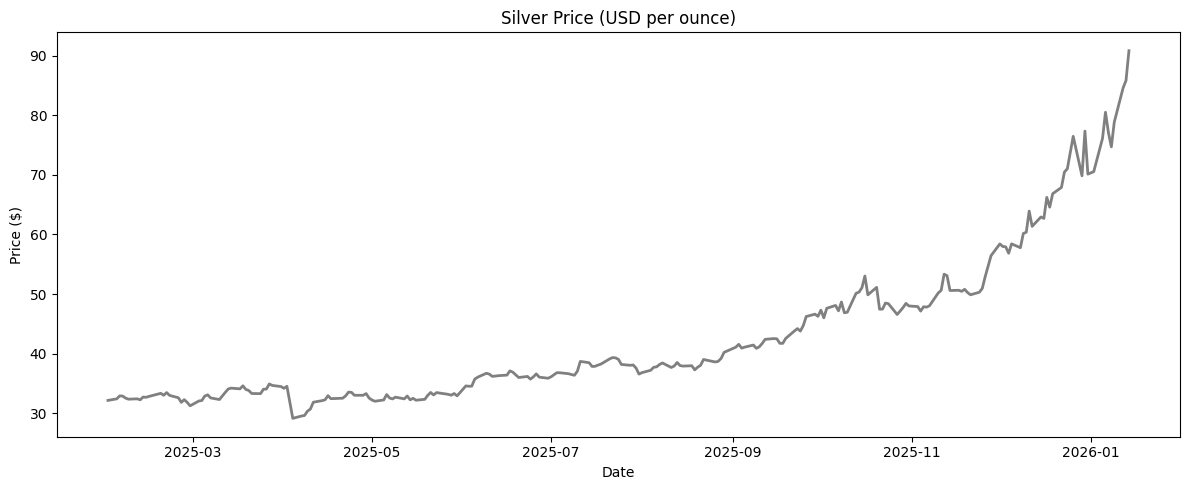

In [7]:
# Silver Price Chart
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['SILVER'], color='gray', linewidth=2)
plt.title('Silver Price (USD per ounce)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

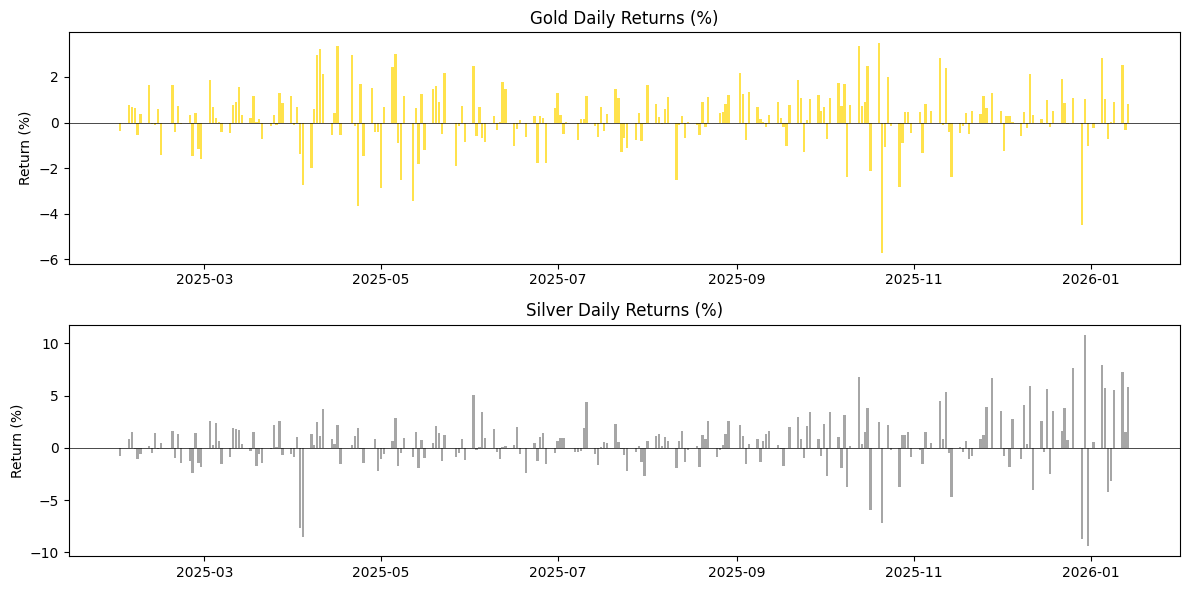

In [8]:
# Plot daily returns
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

axes[0].bar(df_clean.index, df_clean['GOLD_return'], color='gold', alpha=0.7)
axes[0].set_title('Gold Daily Returns (%)')
axes[0].set_ylabel('Return (%)')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

axes[1].bar(df_clean.index, df_clean['SILVER_return'], color='gray', alpha=0.7)
axes[1].set_title('Silver Daily Returns (%)')
axes[1].set_ylabel('Return (%)')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

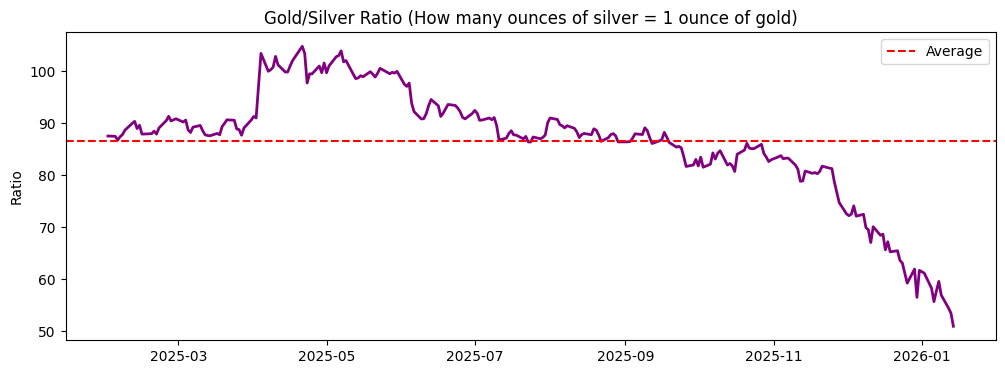

In [9]:
# Gold/Silver ratio over time
plt.figure(figsize=(12, 4))
plt.plot(df_clean.index, df_clean['gold_silver_ratio'], color='purple', linewidth=2)
plt.title('Gold/Silver Ratio (How many ounces of silver = 1 ounce of gold)')
plt.ylabel('Ratio')
plt.axhline(y=df_clean['gold_silver_ratio'].mean(), color='red', linestyle='--', label='Average')
plt.legend()
plt.show()

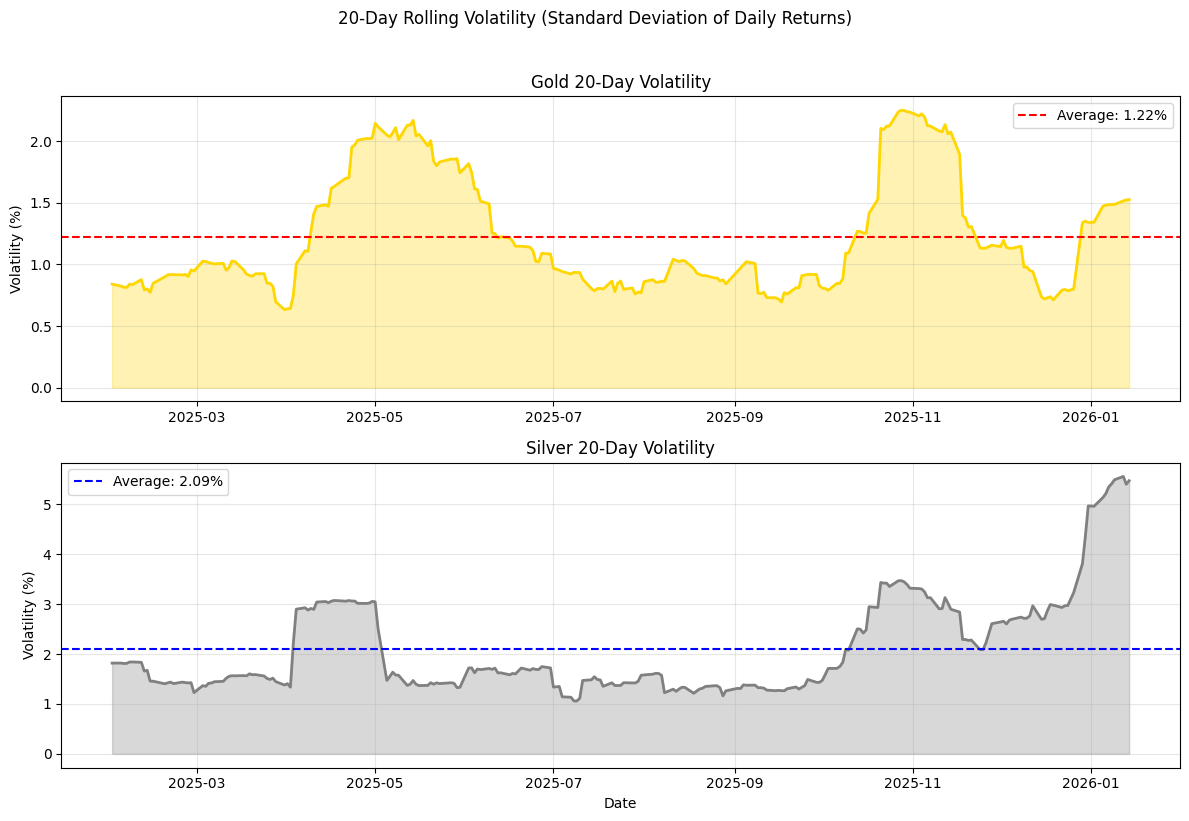

Volatility Statistics:

Gold 20-Day Volatility:
  Min: 0.63%
  Max: 2.25%
  Average: 1.22%

Silver 20-Day Volatility:
  Min: 1.06%
  Max: 5.56%
  Average: 2.09%


In [34]:
# Plot 20-day Volatility for Gold and Silver
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Gold volatility
axes[0].plot(df_clean.index, df_clean['GOLD_volatility'], color='gold', linewidth=2)
axes[0].axhline(y=df_clean['GOLD_volatility'].mean(), color='red', linestyle='--', label=f'Average: {df_clean["GOLD_volatility"].mean():.2f}%')
axes[0].fill_between(df_clean.index, 0, df_clean['GOLD_volatility'], alpha=0.3, color='gold')
axes[0].set_title('Gold 20-Day Volatility')
axes[0].set_ylabel('Volatility (%)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silver volatility
axes[1].plot(df_clean.index, df_clean['SILVER_volatility'], color='gray', linewidth=2)
axes[1].axhline(y=df_clean['SILVER_volatility'].mean(), color='blue', linestyle='--', label=f'Average: {df_clean["SILVER_volatility"].mean():.2f}%')
axes[1].fill_between(df_clean.index, 0, df_clean['SILVER_volatility'], alpha=0.3, color='gray')
axes[1].set_title('Silver 20-Day Volatility')
axes[1].set_ylabel('Volatility (%)')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('20-Day Rolling Volatility (Standard Deviation of Daily Returns)', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

# Print volatility statistics
print("Volatility Statistics:")
print(f"\nGold 20-Day Volatility:")
print(f"  Min: {df_clean['GOLD_volatility'].min():.2f}%")
print(f"  Max: {df_clean['GOLD_volatility'].max():.2f}%")
print(f"  Average: {df_clean['GOLD_volatility'].mean():.2f}%")

print(f"\nSilver 20-Day Volatility:")
print(f"  Min: {df_clean['SILVER_volatility'].min():.2f}%")
print(f"  Max: {df_clean['SILVER_volatility'].max():.2f}%")
print(f"  Average: {df_clean['SILVER_volatility'].mean():.2f}%")

## Step 5: Prepare Data for Machine Learning

Now we'll set up our data to train a simple prediction model.

**Goal:** Predict tomorrow's Gold price using today's features.

In [10]:
# Import machine learning libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Import XGBoost
import xgboost as xgb

print("ML libraries imported!")

ML libraries imported!


In [11]:
# Choose what we want to predict
target = 'GOLD'

# Choose our features (everything except the raw prices)
feature_columns = ['GOLD_return', 'GOLD_ma10', 'GOLD_ma20', 'GOLD_volatility',
                   'SILVER_return', 'SILVER_ma10', 'SILVER_ma20', 'SILVER_volatility',
                   'gold_silver_ratio']

# Create X (features) and y (target)
X = df_clean[feature_columns]
y = df_clean[target]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeatures we're using: {feature_columns}")

Features (X) shape: (241, 9)
Target (y) shape: (241,)

Features we're using: ['GOLD_return', 'GOLD_ma10', 'GOLD_ma20', 'GOLD_volatility', 'SILVER_return', 'SILVER_ma10', 'SILVER_ma20', 'SILVER_volatility', 'gold_silver_ratio']


In [12]:
# Split data into training and testing sets
# We use 80% for training and 20% for testing
# shuffle=False because this is time series data (order matters!)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    shuffle=False  # Important for time series!
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 192
Testing samples: 49


## Step 6: Train the Model

We'll use Linear Regression - one of the simplest machine learning models.

In [13]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage

print("Model Performance:")
print(f"  RMSE (Root Mean Squared Error): ${rmse:.2f}")
print(f"  R² Score: {r2:.4f}")
print(f"  MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print("\nInterpretation:")
print(f"  - On average, our predictions are off by about ${rmse:.2f}")
print(f"  - R² of {r2:.2%} means the model explains {r2:.1%} of the price variation")
print(f"  - MAPE of {mape:.2f}% means predictions are off by {mape:.2f}% on average")

Model Performance:
  RMSE (Root Mean Squared Error): $124.42
  R² Score: 0.4928
  MAPE (Mean Absolute Percentage Error): 2.33%

Interpretation:
  - On average, our predictions are off by about $124.42
  - R² of 49.28% means the model explains 49.3% of the price variation
  - MAPE of 2.33% means predictions are off by 2.33% on average


## Step 7: Visualize Predictions

Let's see how well our model did by comparing actual vs predicted prices.

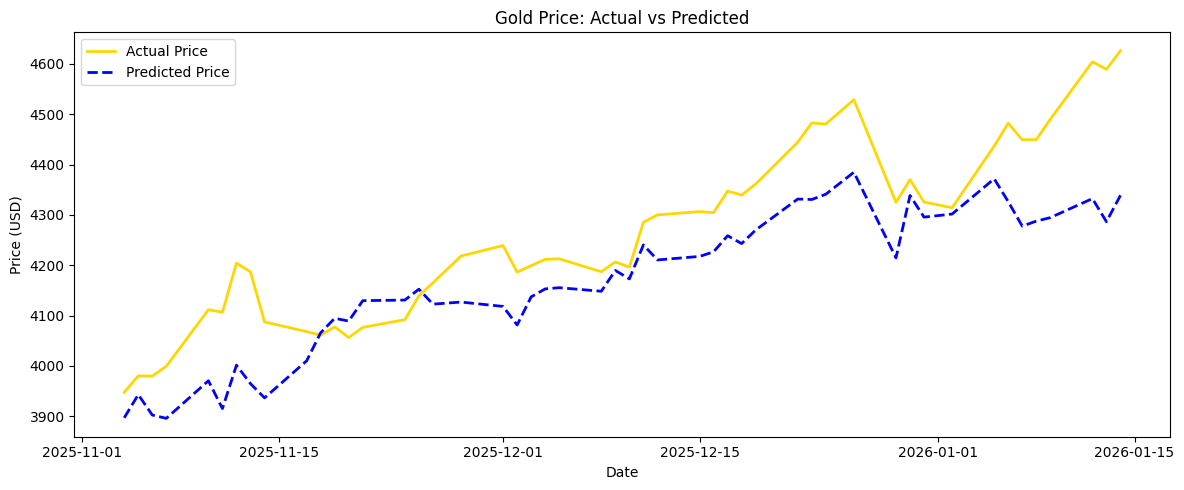

In [15]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 5))

# Get the dates for the test set
test_dates = df_clean.index[-len(y_test):]

plt.plot(test_dates, y_test.values, label='Actual Price', color='gold', linewidth=2)
plt.plot(test_dates, y_pred, label='Predicted Price', color='blue', linestyle='--', linewidth=2)

plt.title('Gold Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

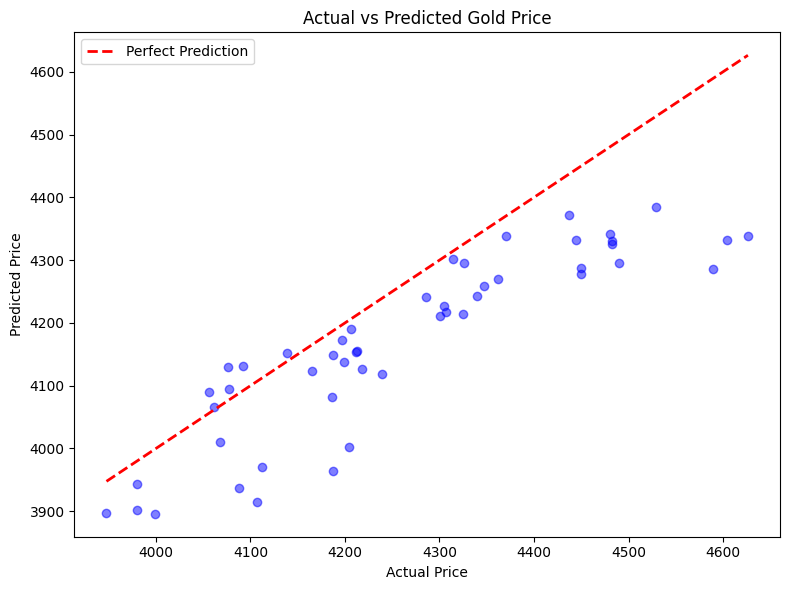

In [16]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Gold Price')
plt.legend()
plt.tight_layout()
plt.show()

## Step 8: Feature Importance

Let's see which features are most important for predicting gold prices.

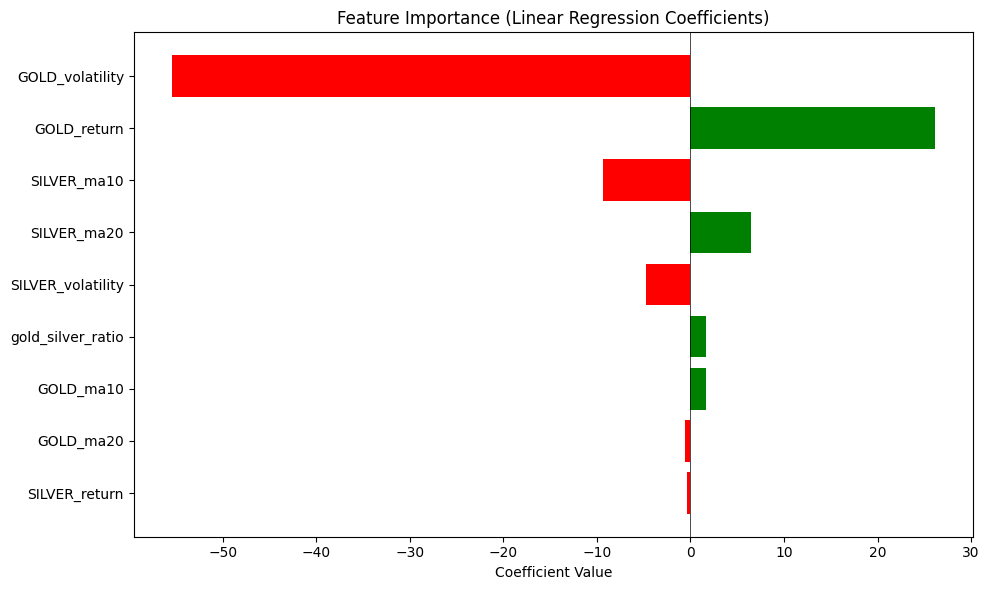

In [17]:
# Get feature importance from the model coefficients
importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_
})

# Sort by absolute value of coefficient
importance['Abs_Coefficient'] = abs(importance['Coefficient'])
importance = importance.sort_values('Abs_Coefficient', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in importance['Coefficient']]
plt.barh(importance['Feature'], importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## Step 9: Compare Multiple Models

Now let's train and compare different machine learning models:
- **Linear Regression**: Simple baseline model
- **Ridge Regression**: Linear regression with regularization (prevents overfitting)
- **Random Forest**: Ensemble of decision trees
- **XGBoost**: Gradient boosting algorithm (often wins competitions!)

We'll also use **TimeSeriesSplit** cross-validation to get more robust performance estimates. TimeSeriesSplit respects the temporal order of the data by always training on past data and testing on future data.

In [18]:
# Function to train and evaluate a model with TimeSeriesSplit
from sklearn.base import clone

def evaluate_model(model, X_train, X_test, y_train, y_test, X_full=None, y_full=None):
    """Train a model and return performance metrics including TimeSeriesSplit CV."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    
    # TimeSeriesSplit cross-validation (if full data provided)
    cv_rmse = None
    if X_full is not None and y_full is not None:
        tscv = TimeSeriesSplit(n_splits=5)
        model_cv = clone(model)
        cv_scores = cross_val_score(model_cv, X_full, y_full, cv=tscv, scoring='neg_root_mean_squared_error')
        cv_rmse = -cv_scores.mean()
    
    return rmse, r2, mape, y_pred, cv_rmse

print("Evaluation function created!")

Evaluation function created!


In [19]:
# Define our models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

print("Models defined:")
for name in models.keys():
    print(f"  - {name}")

Models defined:
  - Linear Regression
  - Ridge Regression
  - Random Forest
  - XGBoost


### Gold Price Prediction - Model Comparison

In [20]:
# Train and evaluate all models for GOLD
print("=" * 70)
print("GOLD PRICE PREDICTION - MODEL COMPARISON")
print("=" * 70)

# Prepare data for Gold
X_gold = df_clean[feature_columns]
y_gold = df_clean['GOLD']
X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(
    X_gold, y_gold, test_size=0.2, shuffle=False
)

# Store results
gold_results = []
gold_predictions = {}

for name, model in models.items():
    rmse, r2, mape, y_pred, cv_rmse = evaluate_model(
        model, X_train_gold, X_test_gold, y_train_gold, y_test_gold,
        X_full=X_gold, y_full=y_gold
    )
    gold_results.append({
        'Model': name,
        'RMSE ($)': rmse,
        'R²': r2,
        'MAPE (%)': mape,
        'CV RMSE (TimeSeriesSplit)': cv_rmse
    })
    gold_predictions[name] = y_pred
    print(f"{name}: RMSE=${rmse:.2f}, R²={r2:.4f}, MAPE={mape:.2f}%, CV_RMSE=${cv_rmse:.2f}")

# Create results DataFrame
gold_results_df = pd.DataFrame(gold_results)
print("\n")
gold_results_df

GOLD PRICE PREDICTION - MODEL COMPARISON
Linear Regression: RMSE=$124.42, R²=0.4928, MAPE=2.33%, CV_RMSE=$113.28
Ridge Regression: RMSE=$118.59, R²=0.5392, MAPE=2.21%, CV_RMSE=$102.90
Random Forest: RMSE=$213.29, R²=-0.4906, MAPE=3.72%, CV_RMSE=$234.96
XGBoost: RMSE=$317.34, R²=-2.2997, MAPE=6.01%, CV_RMSE=$216.75




,Model,RMSE ($),R²,MAPE (%),CV RMSE (TimeSeriesSplit)
0,Linear Regression,124.420731,0.492776,2.326595,113.278504
1,Ridge Regression,118.586208,0.539232,2.210933,102.898084
2,Random Forest,213.294577,-0.490643,3.718750,234.961037
3,XGBoost,317.343614,-2.299692,6.005463,216.754134


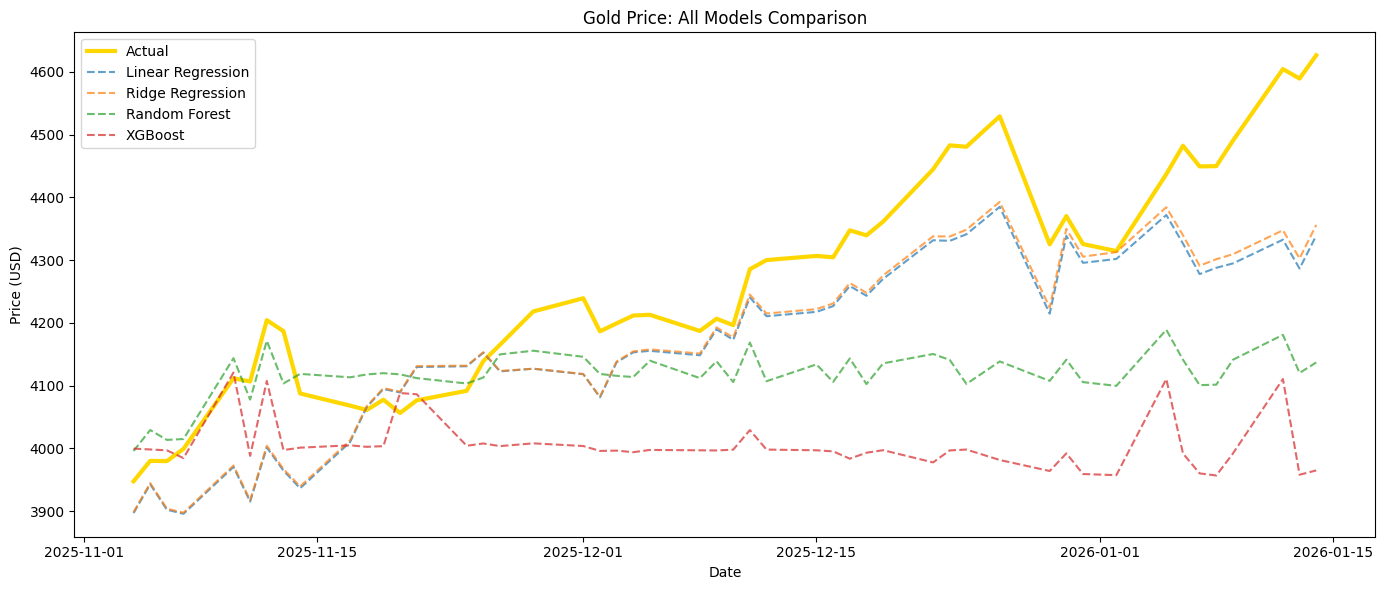

In [21]:
# Visualize Gold predictions from all models
plt.figure(figsize=(14, 6))
test_dates_gold = df_clean.index[-len(y_test_gold):]

plt.plot(test_dates_gold, y_test_gold.values, label='Actual', color='gold', linewidth=3)

colors = ['blue', 'green', 'red', 'purple']
for (name, y_pred), color in zip(gold_predictions.items(), colors):
    plt.plot(test_dates_gold, y_pred, label=name, linestyle='--', alpha=0.7)

plt.title('Gold Price: All Models Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

### Silver Price Prediction - Model Comparison

In [22]:
# Train and evaluate all models for SILVER
print("=" * 70)
print("SILVER PRICE PREDICTION - MODEL COMPARISON")
print("=" * 70)

# Prepare data for Silver
X_silver = df_clean[feature_columns]
y_silver = df_clean['SILVER']
X_train_silver, X_test_silver, y_train_silver, y_test_silver = train_test_split(
    X_silver, y_silver, test_size=0.2, shuffle=False
)

# Store results - need to recreate models (they were already fitted)
models_silver = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

silver_results = []
silver_predictions = {}

for name, model in models_silver.items():
    rmse, r2, mape, y_pred, cv_rmse = evaluate_model(
        model, X_train_silver, X_test_silver, y_train_silver, y_test_silver,
        X_full=X_silver, y_full=y_silver
    )
    silver_results.append({
        'Model': name,
        'RMSE ($)': rmse,
        'R²': r2,
        'MAPE (%)': mape,
        'CV RMSE (TimeSeriesSplit)': cv_rmse
    })
    silver_predictions[name] = y_pred
    print(f"{name}: RMSE=${rmse:.2f}, R²={r2:.4f}, MAPE={mape:.2f}%, CV_RMSE=${cv_rmse:.2f}")

# Create results DataFrame
silver_results_df = pd.DataFrame(silver_results)
print("\n")
silver_results_df

SILVER PRICE PREDICTION - MODEL COMPARISON
Linear Regression: RMSE=$8.71, R²=0.4327, MAPE=9.31%, CV_RMSE=$2.88
Ridge Regression: RMSE=$8.66, R²=0.4388, MAPE=9.26%, CV_RMSE=$2.71
Random Forest: RMSE=$17.30, R²=-1.2385, MAPE=18.54%, CV_RMSE=$6.08
XGBoost: RMSE=$16.33, R²=-0.9960, MAPE=16.60%, CV_RMSE=$6.10




,Model,RMSE ($),R²,MAPE (%),CV RMSE (TimeSeriesSplit)
0,Linear Regression,8.707210,0.432719,9.307981,2.877829
1,Ridge Regression,8.660136,0.438836,9.259844,2.709120
2,Random Forest,17.296360,-1.238461,18.544669,6.080982
3,XGBoost,16.332867,-0.996021,16.601984,6.096618


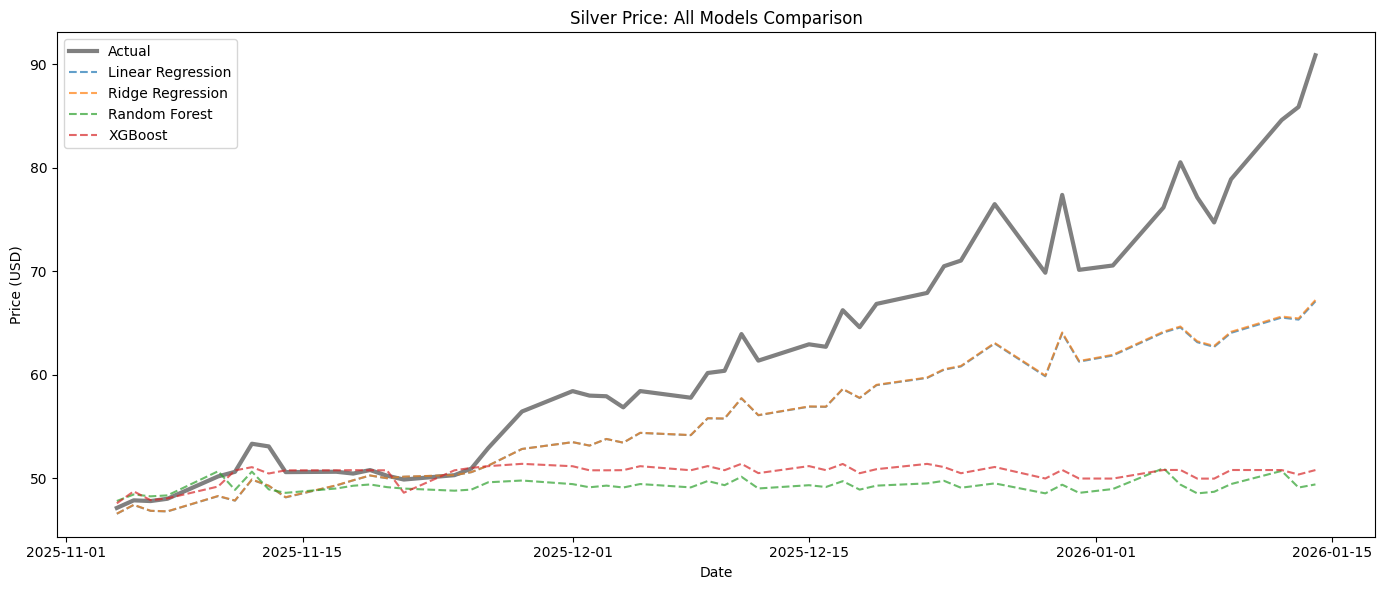

In [23]:
# Visualize Silver predictions from all models
plt.figure(figsize=(14, 6))
test_dates_silver = df_clean.index[-len(y_test_silver):]

plt.plot(test_dates_silver, y_test_silver.values, label='Actual', color='gray', linewidth=3)

colors = ['blue', 'green', 'red', 'purple']
for (name, y_pred), color in zip(silver_predictions.items(), colors):
    plt.plot(test_dates_silver, y_pred, label=name, linestyle='--', alpha=0.7)

plt.title('Silver Price: All Models Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

## Step 10: Final Model Comparison

Let's see a side-by-side comparison of all models for both Gold and Silver.

In [24]:
# Combine Gold and Silver results for comparison
print("=" * 80)
print("FINAL MODEL COMPARISON (with TimeSeriesSplit Cross-Validation)")
print("=" * 80)

# Add asset column to each dataframe
gold_results_df['Asset'] = 'Gold'
silver_results_df['Asset'] = 'Silver'

# Combine all results
all_results = pd.concat([gold_results_df, silver_results_df], ignore_index=True)

# Reorder columns
all_results = all_results[['Asset', 'Model', 'RMSE ($)', 'R²', 'MAPE (%)', 'CV RMSE (TimeSeriesSplit)']]

print("\nAll Results:")
all_results

FINAL MODEL COMPARISON (with TimeSeriesSplit Cross-Validation)

All Results:


,Asset,Model,RMSE ($),R²,MAPE (%),CV RMSE (TimeSeriesSplit)
0,Gold,Linear Regression,124.420731,0.492776,2.326595,113.278504
1,Gold,Ridge Regression,118.586208,0.539232,2.210933,102.898084
2,Gold,Random Forest,213.294577,-0.490643,3.718750,234.961037
3,Gold,XGBoost,317.343614,-2.299692,6.005463,216.754134
4,Silver,Linear Regression,8.707210,0.432719,9.307981,2.877829
5,Silver,Ridge Regression,8.660136,0.438836,9.259844,2.709120
6,Silver,Random Forest,17.296360,-1.238461,18.544669,6.080982
7,Silver,XGBoost,16.332867,-0.996021,16.601984,6.096618


In [25]:
# Create formatted comparison tables for presentation
print("=" * 80)
print("MODEL COMPARISON TABLES")
print("=" * 80)

# Format Gold results
gold_table = gold_results_df[['Model', 'RMSE ($)', 'R²', 'MAPE (%)', 'CV RMSE (TimeSeriesSplit)']].copy()
gold_table['RMSE ($)'] = gold_table['RMSE ($)'].apply(lambda x: f'${x:.2f}')
gold_table['R²'] = gold_table['R²'].apply(lambda x: f'{x:.4f}')
gold_table['MAPE (%)'] = gold_table['MAPE (%)'].apply(lambda x: f'{x:.2f}%')
gold_table['CV RMSE (TimeSeriesSplit)'] = gold_table['CV RMSE (TimeSeriesSplit)'].apply(lambda x: f'${x:.2f}')
gold_table.columns = ['Model', 'RMSE', 'R²', 'MAPE', 'CV RMSE']

print("\n📊 GOLD PRICE PREDICTION - All Models:")
print(gold_table.to_string(index=False))

# Format Silver results
silver_table = silver_results_df[['Model', 'RMSE ($)', 'R²', 'MAPE (%)', 'CV RMSE (TimeSeriesSplit)']].copy()
silver_table['RMSE ($)'] = silver_table['RMSE ($)'].apply(lambda x: f'${x:.2f}')
silver_table['R²'] = silver_table['R²'].apply(lambda x: f'{x:.4f}')
silver_table['MAPE (%)'] = silver_table['MAPE (%)'].apply(lambda x: f'{x:.2f}%')
silver_table['CV RMSE (TimeSeriesSplit)'] = silver_table['CV RMSE (TimeSeriesSplit)'].apply(lambda x: f'${x:.2f}')
silver_table.columns = ['Model', 'RMSE', 'R²', 'MAPE', 'CV RMSE']

print("\n📊 SILVER PRICE PREDICTION - All Models:")
print(silver_table.to_string(index=False))

MODEL COMPARISON TABLES

📊 GOLD PRICE PREDICTION - All Models:
            Model    RMSE      R²  MAPE CV RMSE
Linear Regression $124.42  0.4928 2.33% $113.28
 Ridge Regression $118.59  0.5392 2.21% $102.90
    Random Forest $213.29 -0.4906 3.72% $234.96
          XGBoost $317.34 -2.2997 6.01% $216.75

📊 SILVER PRICE PREDICTION - All Models:
            Model   RMSE      R²   MAPE CV RMSE
Linear Regression  $8.71  0.4327  9.31%   $2.88
 Ridge Regression  $8.66  0.4388  9.26%   $2.71
    Random Forest $17.30 -1.2385 18.54%   $6.08
          XGBoost $16.33 -0.9960 16.60%   $6.10


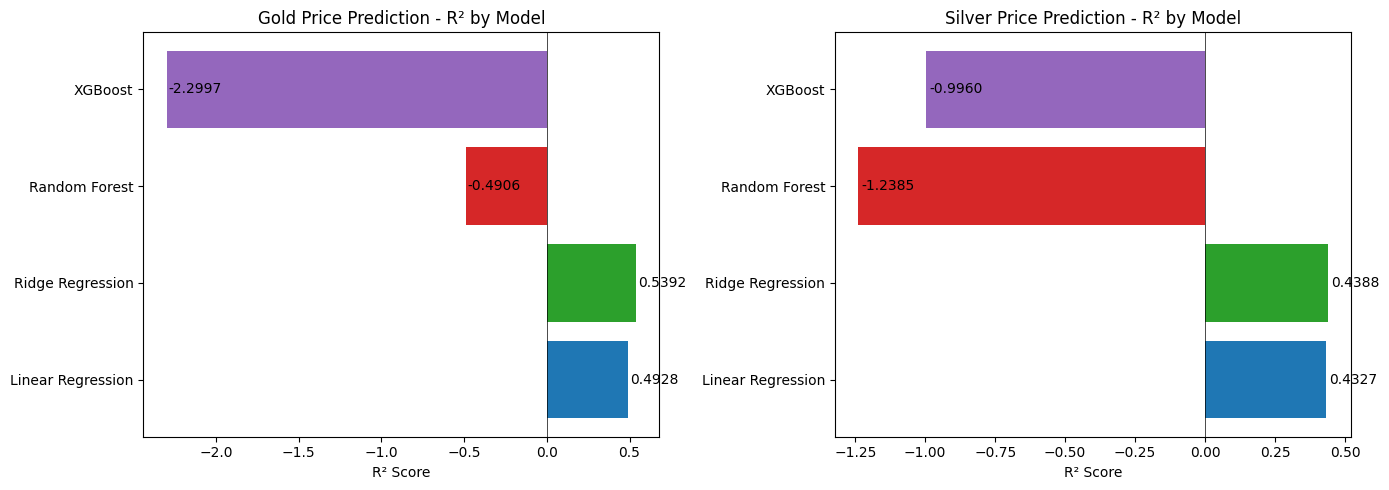

In [26]:
# Visual comparison of R² scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gold R² comparison
models_list = gold_results_df['Model'].tolist()
gold_r2 = gold_results_df['R²'].tolist()
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']

axes[0].barh(models_list, gold_r2, color=colors)
axes[0].set_xlabel('R² Score')
axes[0].set_title('Gold Price Prediction - R² by Model')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
for i, v in enumerate(gold_r2):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center')

# Silver R² comparison
silver_r2 = silver_results_df['R²'].tolist()

axes[1].barh(models_list, silver_r2, color=colors)
axes[1].set_xlabel('R² Score')
axes[1].set_title('Silver Price Prediction - R² by Model')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
for i, v in enumerate(silver_r2):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

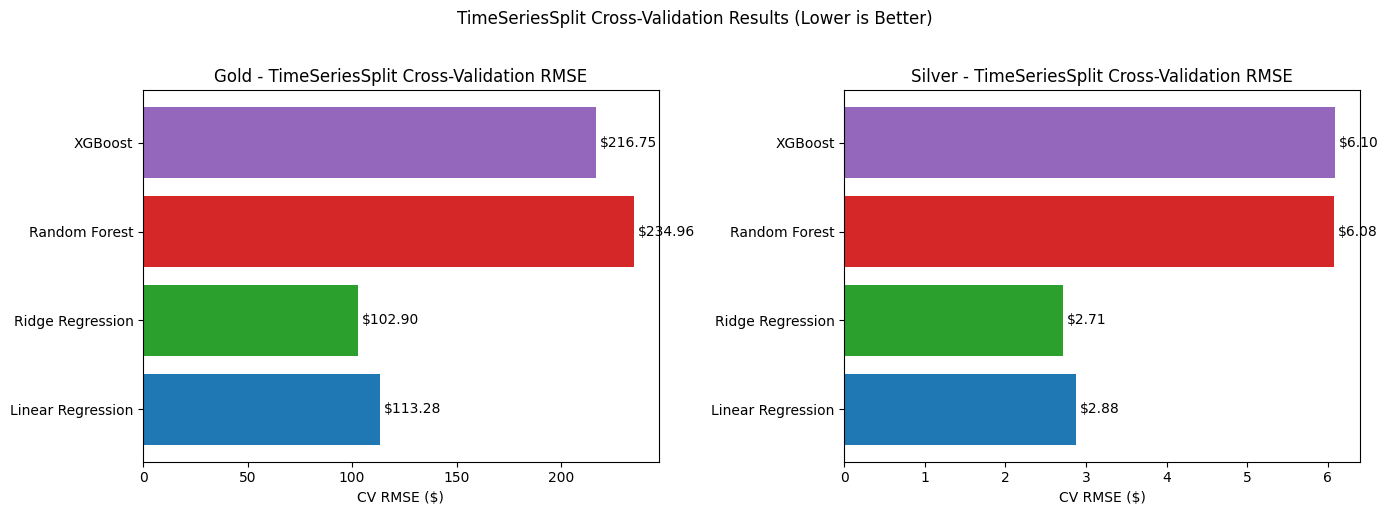

In [27]:
# Visual comparison of CV RMSE (TimeSeriesSplit) scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gold CV RMSE comparison
models_list = gold_results_df['Model'].tolist()
gold_cv_rmse = gold_results_df['CV RMSE (TimeSeriesSplit)'].tolist()
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']

axes[0].barh(models_list, gold_cv_rmse, color=colors)
axes[0].set_xlabel('CV RMSE ($)')
axes[0].set_title('Gold - TimeSeriesSplit Cross-Validation RMSE')
for i, v in enumerate(gold_cv_rmse):
    axes[0].text(v + 2, i, f'${v:.2f}', va='center')

# Silver CV RMSE comparison
silver_cv_rmse = silver_results_df['CV RMSE (TimeSeriesSplit)'].tolist()

axes[1].barh(models_list, silver_cv_rmse, color=colors)
axes[1].set_xlabel('CV RMSE ($)')
axes[1].set_title('Silver - TimeSeriesSplit Cross-Validation RMSE')
for i, v in enumerate(silver_cv_rmse):
    axes[1].text(v + 0.05, i, f'${v:.2f}', va='center')

plt.suptitle('TimeSeriesSplit Cross-Validation Results (Lower is Better)', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

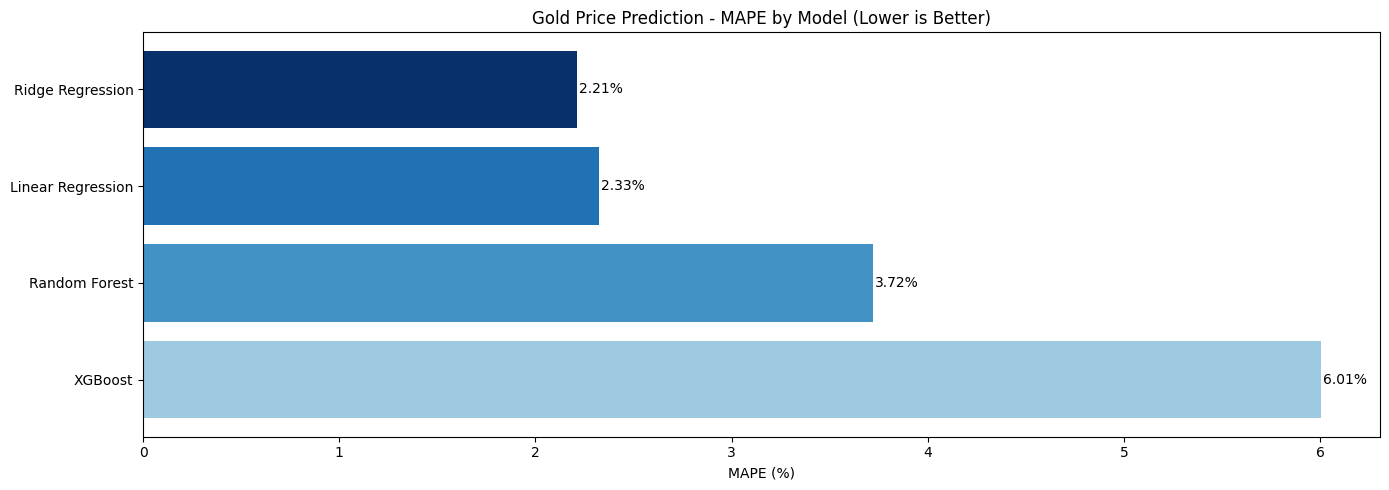

In [28]:
# Visual comparison of MAPE scores - GOLD (lowest at top)
plt.figure(figsize=(14, 5))

# Sort by MAPE descending so lowest appears at top of chart
gold_sorted = gold_results_df.sort_values('MAPE (%)', ascending=False)
models_list = gold_sorted['Model'].tolist()
gold_mape = gold_sorted['MAPE (%)'].tolist()
colors = ['#9ecae1', '#4292c6', '#2171b5', '#08306b']  # Shades of blue (light to dark for best)

plt.barh(models_list, gold_mape, color=colors)
plt.xlabel('MAPE (%)')
plt.title('Gold Price Prediction - MAPE by Model (Lower is Better)')
for i, v in enumerate(gold_mape):
    plt.text(v + 0.01, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

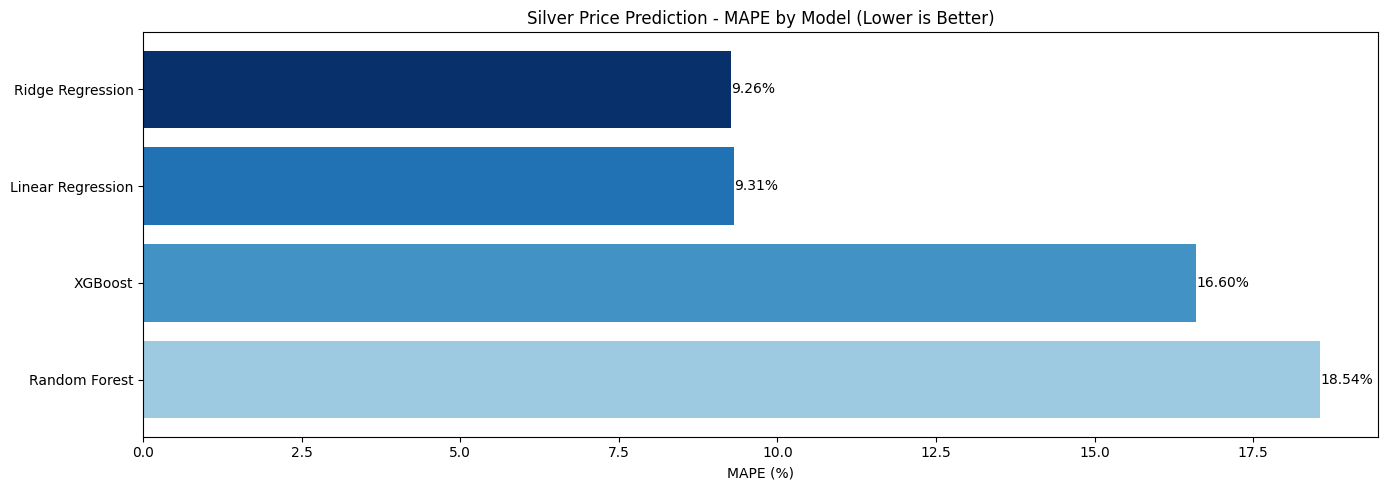

In [29]:
# Visual comparison of MAPE scores - SILVER (lowest at top)
plt.figure(figsize=(14, 5))

# Sort by MAPE descending so lowest appears at top of chart
silver_sorted = silver_results_df.sort_values('MAPE (%)', ascending=False)
models_list = silver_sorted['Model'].tolist()
silver_mape = silver_sorted['MAPE (%)'].tolist()
colors = ['#9ecae1', '#4292c6', '#2171b5', '#08306b']  # Shades of blue (light to dark for best)

plt.barh(models_list, silver_mape, color=colors)
plt.xlabel('MAPE (%)')
plt.title('Silver Price Prediction - MAPE by Model (Lower is Better)')
for i, v in enumerate(silver_mape):
    plt.text(v + 0.01, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

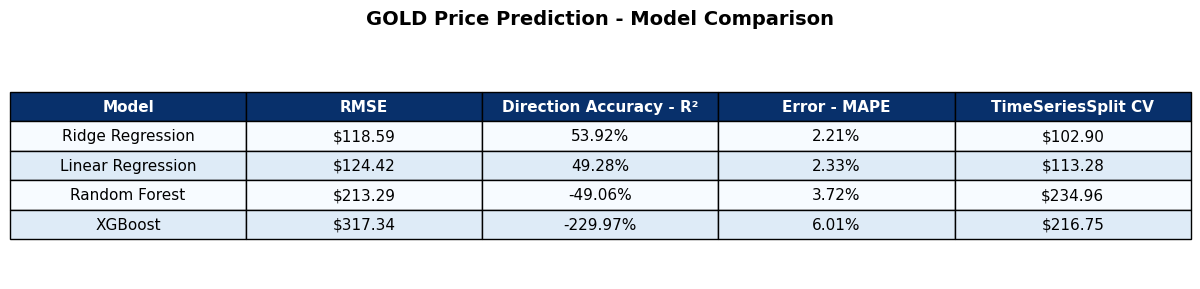

In [31]:
# Table visualization - GOLD Model Comparison
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')

# Prepare data for table (sorted by MAPE ascending - best first)
gold_table_data = gold_results_df[['Model', 'RMSE ($)', 'R²', 'MAPE (%)', 'CV RMSE (TimeSeriesSplit)']].copy()
gold_table_data = gold_table_data.sort_values('MAPE (%)', ascending=True)
gold_table_data['RMSE ($)'] = gold_table_data['RMSE ($)'].apply(lambda x: f'${x:.2f}')
gold_table_data['R²'] = gold_table_data['R²'].apply(lambda x: f'{x*100:.2f}%')
gold_table_data['MAPE (%)'] = gold_table_data['MAPE (%)'].apply(lambda x: f'{x:.2f}%')
gold_table_data['CV RMSE (TimeSeriesSplit)'] = gold_table_data['CV RMSE (TimeSeriesSplit)'].apply(lambda x: f'${x:.2f}')
gold_table_data.columns = ['Model', 'RMSE', 'Direction Accuracy - R²', 'Error - MAPE', 'TimeSeriesSplit CV']

# Create table
table = ax.table(
    cellText=gold_table_data.values,
    colLabels=gold_table_data.columns,
    cellLoc='center',
    loc='center',
    colColours=['#08306b'] * len(gold_table_data.columns)
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)

# Style header cells
for j in range(len(gold_table_data.columns)):
    table[(0, j)].set_text_props(color='white', fontweight='bold')

# Alternate row colors
for i in range(1, len(gold_table_data) + 1):
    for j in range(len(gold_table_data.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#deebf7')
        else:
            table[(i, j)].set_facecolor('#f7fbff')

ax.set_title('GOLD Price Prediction - Model Comparison', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

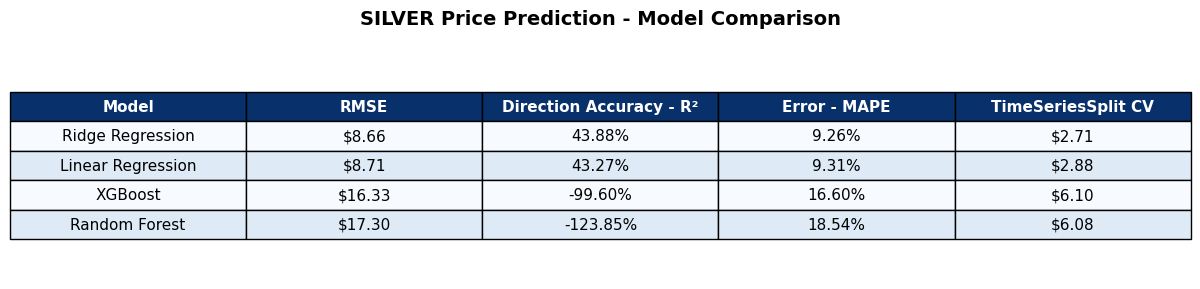

In [33]:
# Table visualization - SILVER Model Comparison
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
# Prepare data for table (sorted by MAPE ascending - best first)
silver_table_data = silver_results_df[['Model', 'RMSE ($)', 'R²', 'MAPE (%)', 'CV RMSE (TimeSeriesSplit)']].copy()
silver_table_data = silver_table_data.sort_values('MAPE (%)', ascending=True)
silver_table_data['RMSE ($)'] = silver_table_data['RMSE ($)'].apply(lambda x: f'${x:.2f}')
silver_table_data['R²'] = silver_table_data['R²'].apply(lambda x: f'{x*100:.2f}%')
silver_table_data['MAPE (%)'] = silver_table_data['MAPE (%)'].apply(lambda x: f'{x:.2f}%')
silver_table_data['CV RMSE (TimeSeriesSplit)'] = silver_table_data['CV RMSE (TimeSeriesSplit)'].apply(lambda x: f'${x:.2f}')
silver_table_data.columns = ['Model', 'RMSE', 'Direction Accuracy - R²', 'Error - MAPE', 'TimeSeriesSplit CV']
# Create table
table = ax.table(
    cellText=silver_table_data.values,
    colLabels=silver_table_data.columns,
    cellLoc='center',
    loc='center',
    colColours=['#08306b'] * len(silver_table_data.columns)
)
# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)
# Style header cells
for j in range(len(silver_table_data.columns)):
    table[(0, j)].set_text_props(color='white', fontweight='bold')
# Alternate row colors
for i in range(1, len(silver_table_data) + 1):
    for j in range(len(silver_table_data.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#deebf7')
        else:
            table[(i, j)].set_facecolor('#f7fbff')
ax.set_title('SILVER Price Prediction - Model Comparison', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [32]:
# Find the best model for each asset
print("=" * 70)
print("BEST MODELS")
print("=" * 70)

# Best model for Gold (highest R²)
best_gold = gold_results_df.loc[gold_results_df['R²'].idxmax()]
print(f"\nBest model for GOLD: {best_gold['Model']}")
print(f"  R² Score: {best_gold['R²']:.4f}")
print(f"  RMSE: ${best_gold['RMSE ($)']:.2f}")
print(f"  MAPE: {best_gold['MAPE (%)']:.2f}%")
print(f"  CV RMSE (TimeSeriesSplit): ${best_gold['CV RMSE (TimeSeriesSplit)']:.2f}")

# Best model for Silver (highest R²)
best_silver = silver_results_df.loc[silver_results_df['R²'].idxmax()]
print(f"\nBest model for SILVER: {best_silver['Model']}")
print(f"  R² Score: {best_silver['R²']:.4f}")
print(f"  RMSE: ${best_silver['RMSE ($)']:.2f}")
print(f"  MAPE: {best_silver['MAPE (%)']:.2f}%")
print(f"  CV RMSE (TimeSeriesSplit): ${best_silver['CV RMSE (TimeSeriesSplit)']:.2f}")

BEST MODELS

Best model for GOLD: Ridge Regression
  R² Score: 0.5392
  RMSE: $118.59
  MAPE: 2.21%
  CV RMSE (TimeSeriesSplit): $102.90

Best model for SILVER: Ridge Regression
  R² Score: 0.4388
  RMSE: $8.66
  MAPE: 9.26%
  CV RMSE (TimeSeriesSplit): $2.71


## Summary

In this notebook, we learned how to:

1. **Download financial data** using yFinance
2. **Create features** like moving averages, returns, and volatility
3. **Visualize** price trends and patterns
4. **Train multiple machine learning models**:
   - Linear Regression
   - Ridge Regression
   - Random Forest
   - XGBoost
5. **Evaluate model performance** using:
   - RMSE (Root Mean Squared Error)
   - R² (R-squared)
   - MAPE (Mean Absolute Percentage Error)
   - TimeSeriesSplit Cross-Validation
6. **Compare models** for both Gold and Silver prices

**Key Metrics Explained:**
- **RMSE**: Average prediction error in dollars (lower is better)
- **R²**: How much of the price variation the model explains (closer to 1 is better)
- **MAPE**: Average percentage error (lower is better)
- **CV RMSE (TimeSeriesSplit)**: Cross-validated RMSE using time-aware splits (more robust estimate)